<a href="https://colab.research.google.com/github/fisicorj/Astrophysics/blob/main/comparar_saidas_cmfgem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

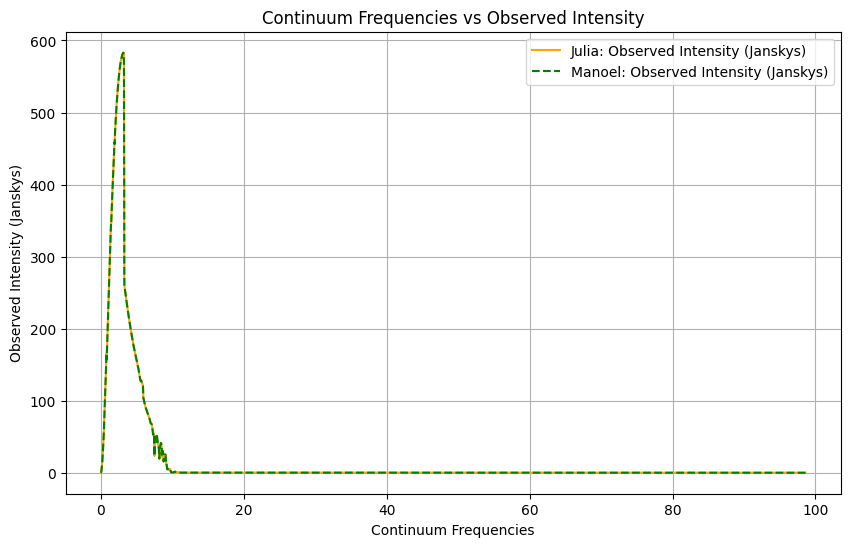

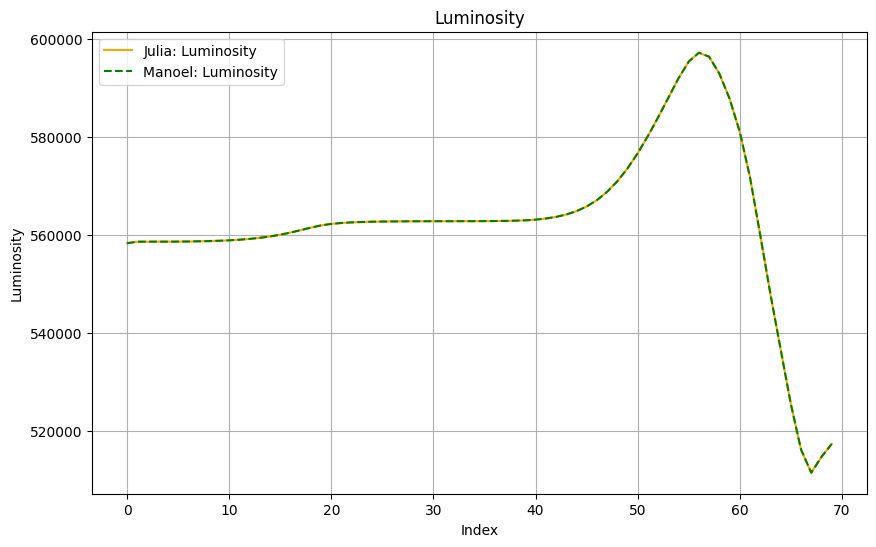

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function to process a file and extract data sections
def process_file(file_path):
    with open(file_path, 'r') as file:
        content = file.readlines()

    # Headers to identify sections
    headers = {
        "frequencies": "Continuum Frequencies",
        "intensity": "Observed intensity (Janskys)",
        "luminosity": "Luminosity"
    }

    # Group lines into sections based on headers and blank lines
    data_blocks = []
    current_block = []
    for line in content:
        stripped = line.strip()
        if stripped in headers.values() or not stripped:
            if current_block:  # Save the current block before moving to the next
                data_blocks.append(current_block)
            current_block = [stripped] if stripped in headers.values() else []
        else:
            current_block.append(stripped)
    if current_block:  # Add the last block if any
        data_blocks.append(current_block)

    # Extracting numerical data from the identified blocks
    sections = {
        "frequencies": np.array([float(num) for line in data_blocks[1] for num in line.split()]),
        "intensity": np.array([float(num) for line in data_blocks[3] for num in line.split()]),
        "luminosity": np.array([float(num) for line in data_blocks[5] for num in line.split()]),
    }

    return sections

# Process both files
file1_sections = process_file('OBSFLUX')
file2_sections = process_file('OBSFLUX2')

# Plot Continuum Frequencies vs Observed Intensity for both files
plt.figure(figsize=(10, 6))
plt.plot(file1_sections["frequencies"], file1_sections["intensity"], label="Julia: Observed Intensity (Janskys)", color='orange')
plt.plot(file2_sections["frequencies"], file2_sections["intensity"], label="Manoel: Observed Intensity (Janskys)", color='green', linestyle="--")
plt.title("Continuum Frequencies vs Observed Intensity")
plt.xlabel("Continuum Frequencies")
plt.ylabel("Observed Intensity (Janskys)")
plt.legend()
plt.grid()
plt.show()

# Plot Luminosity for both files
plt.figure(figsize=(10, 6))
plt.plot(range(len(file1_sections["luminosity"])), file1_sections["luminosity"], label="Julia: Luminosity", color='orange')
plt.plot(range(len(file2_sections["luminosity"])), file2_sections["luminosity"], label="Manoel: Luminosity", color='green', linestyle="--")
plt.title("Luminosity")
plt.xlabel("Index")
plt.ylabel("Luminosity")
plt.legend()
plt.grid()
plt.show()

